# 1

Eq. 1, the classic Q-learning update,

$$ Q(s, a) = Q(s, a) + \alpha\big(r + \gamma \max_{a' \in A} Q(s', a') - Q(s, a) \big) $$

Eq. 2, approximate setting for updating $\hat q(s, a, w)$ function,

$$w = w + \alpha \big(r + \gamma \max_{a' \in A} \hat q(s', a', w) - \hat q(s, a, w)\big) \nabla_w \hat q(s, a, w)$$

Align them together for comparison,

\begin{align*}
Q(s, a) = Q(s, a) &+ \alpha\big(r + \gamma \max_{a' \in A} Q(s', a') - Q(s, a) \big) \\
w = w &+ \alpha \big(r + \gamma \max_{a' \in A} \hat q(s', a', w) - \hat q(s, a, w)\big) \nabla_w \hat q(s, a, w) \\
\end{align*}

Given

\begin{align*}
\hat q(s, a, w) &= w^T x(s,a) \\
\end{align*}

Then $$\nabla_w \hat q(s, a, w) = \nabla_w{w^T x(s,a)} = x(s, a)$$

Note that $x(s, a) \in \mathbb{R}$ is a one-hot vector, and $x(s, a)_{s', a'}$ is the one-hot element in the vector based on

\begin{equation}
  x(s, a)_{s', a'}=\begin{cases}
    1 & \text{if $s' = s, a' = a$}.\\
    0 & \text{otherwise}.
  \end{cases}
\end{equation}

So $w^T x(s,a)$ is essentially the $(s, a)$th element in $w$, which is also the corresponding $q$ value. 

In other words, $w \in \mathbb{R}^{\left|S\right|\left|A\right|}$ is essentially a serialized table. 

Note we are using $(s, a)$ as an index here.

Then the second part of Eq. 2 can be rewritten as 

\begin{align*}
& \alpha \big(r + \gamma \max_{a' \in A} \hat q(s', a', w) - \hat q(s, a, w)\big) \nabla_w \hat q(s, a, w) \\
&= \alpha \big(r + \gamma \max_{a' \in A} w_{s', a'} - w_{s, a}) x(s, a)
\end{align*}

which is also a one-hot vector. Therefore, updating $w$ with this one-hot vector only updates the $(s, a)$th element of $w$, so Eq. 2 can be equivalently written as

$$ w_{s,a} = w_{s, a} + \alpha \big(r + \gamma \max_{a' \in A} w_{s', a'} - w_{s, a})$$

Rewrite $w_{s, a} = Q(s, a)$, then it becomes obvious Eq. 1 and Eq. 2 are exactly the same.

# 2

Note in this problem, $x(s, a) \rightarrow x \in \mathbb{R}$ could be any function.

\begin{align*}
w &= w + \alpha \big(r + \gamma \max_{a' \in A} \hat q(s', a', w) - \hat q(s, a, w)\big) \nabla_w \hat q(s, a, w) \\
  &= w + \alpha \big(r + \gamma \max_{a' \in A} w^T x(s’, a’)\ - w^T x(s, a)\big) \nabla_w w^T x(s, a) \\
  &= w + \alpha \big(r + \gamma \max_{a' \in A} w^T x(s’, a’)\ - w^T x(s, a)\big) x(s, a)
\end{align*}

# 3

see `./q2_linear.py`

# 4

It does reach the optimal achievable reward 4.1 as computed in `./3-Setup-TestEnv.ipynb`

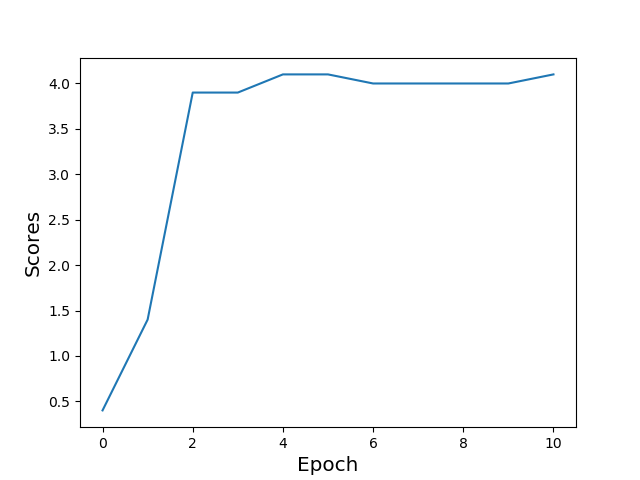

In [5]:
from IPython.display import Image
Image('./results/q2_linear/scores.png', width=400)